<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/keras_applications_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning. In this example, we are going to see how to use them for transfer learning.









# Download the dataset from Kaggle

We will download a dataset from [Kaggle](https://www.kaggle.com/).
A detail information about how to install kaggle API, configure it and check that it works can be seen in the notebook "[set_up_kaggle_api_in_colab.ipynb](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/set_up_kaggle_api_in_colab.ipynb)" in this [course repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course)

In [1]:
# Install kaggle API
! pip install kaggle
# Force install the latest version
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=a90a5d65c1505eaf63ed97b1a0643f06149ecce3ecbb40c017b0623e0c652053
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [5]:
# Upload 'kaggle.json' file to Colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
# Move the uploaded file to a location ~/.kaggle/kaggle.json. 
# Additionally, you need to give proper permissions to the file (since this is a hidden folder). 
# Finally delete the kaggle.json file from the initial location
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
# Checking that it works (optional). For example, run the following command:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        107           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        212           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        577           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3532           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      28581            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       7306           False  
connectx

For this example, we are goingt to download the [Stanford Car Dataset](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) from [Kaggle](https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder). The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images.

In [8]:
# https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
# https://ai.stanford.edu/~jkrause/cars/car_dataset.html
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

 99% 1.81G/1.83G [00:26<00:00, 64.1MB/s]
100% 1.83G/1.83G [00:26<00:00, 73.5MB/s]


We can include `%%capture` magic command to suppress the output.

In [9]:
%%capture

# Unzip the dataset:
!unzip stanford-car-dataset-by-classes-folder

We set the path where the images (for both training and testing) have been extracted:

In [11]:
# Path of the both train and test directories
train_dir='/content/car_data/car_data/train'
test_dir='/content/car_data/car_data/test'

# Introduction to EfficientNet

Compared to other models achieving similar ImageNet accuracy, [EfficientNetB0](https://keras.io/api/applications/efficientnet/#efficientnetb0-function) is much smaller. For example, the [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function) model as you can see in [Keras application](https://keras.io/api/applications/) has `25,636,712` parameters in total (weights are `98 MB`), and even though, it still underperforms the smallest EfficientNet, which only takes `5,330,571` parameters in total (weights are `29 MB`). 

The [EfficientNet](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet) default weights contains 1000 classes labels and they can be excluded while loading the model by specifying the `include_top` argument to `False`.

In [10]:
from tensorflow.keras.applications import EfficientNetB0

base_model_eff_b0 = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights="imagenet")

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model_eff_b0.summary()

As we can see, the output is a `4D` tensor with a shape of `(batch_size, 7, 7, 1280)`. In a similar fashion that we performed in the notebook "[keras_applications_feature_extraction_for_classification.ipynb](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/keras_applications_feature_extraction_for_classification.ipynb)", we can also add a [GlobalMaxPooling2D](https://keras.io/api/layers/pooling_layers/global_max_pooling2d/) layer. 

In [13]:
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras import models
from tensorflow.keras import layers

base_model_eff_b0 = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights="imagenet")
model = models.Sequential()
model.add(base_model_eff_b0)
model.add(layers.GlobalMaxPooling2D())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
_________________________________________________________________


[`GlobalMaxPooling2D()`](https://keras.io/api/layers/pooling_layers/global_max_pooling2d/) accepts as input a `4D` tensor with shape `(batch_size, rows, cols, channels)`. It operates the max on the `rows` and `cols` dimensionalities for all the `channels`. The resulting dimensionality is `2D` (`batch_size`, `channels`). Hence, and as we can see the output is a `2D` tensor with shape `(batch_size, 1280)`. In summary, `GlobalMaxPooling2D()` results in a much smaller number of features compared to the `Flatten() `layer, which effectively reduces the number of parameters.  


# Exploring the dataset

We are going to declare both a `ImageDataGenerator()` for training (`train_datagen`) and another for testing (`test_datagen`).

In [17]:
# According to the creator of Keras François Chollet, Keras ImageDataGenerator() 
# lets us quickly set-up python generators that automatically turn image files into 
# preprocessed tensors that can be fed directly into models during training.
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [18]:
batch_size = 32
img_size = 224
input_shape = (img_size, img_size)

In [19]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)

validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


As we can see, there are 8144 beloinging to 196 classes, which are going to be used for training, and there are 8041 images belonging to the same number of classes, which are going to be used for testing.

At this point we can get the mapping of the classes to indexes created by the generator. Therefore, label_map varible will be a dictionary where each key will be the name of the car (e.g. 'AM General Hummer SUV 2000') and the value will be the corresponding index:

In [20]:
# Get the mapping of classes to indexes created by the generator: {generator.class_indices}
label_map = train_generator.class_indices
print(label_map)

{'AM General Hummer SUV 2000': 0, 'Acura Integra Type R 2001': 1, 'Acura RL Sedan 2012': 2, 'Acura TL Sedan 2012': 3, 'Acura TL Type-S 2008': 4, 'Acura TSX Sedan 2012': 5, 'Acura ZDX Hatchback 2012': 6, 'Aston Martin V8 Vantage Convertible 2012': 7, 'Aston Martin V8 Vantage Coupe 2012': 8, 'Aston Martin Virage Convertible 2012': 9, 'Aston Martin Virage Coupe 2012': 10, 'Audi 100 Sedan 1994': 11, 'Audi 100 Wagon 1994': 12, 'Audi A5 Coupe 2012': 13, 'Audi R8 Coupe 2012': 14, 'Audi RS 4 Convertible 2008': 15, 'Audi S4 Sedan 2007': 16, 'Audi S4 Sedan 2012': 17, 'Audi S5 Convertible 2012': 18, 'Audi S5 Coupe 2012': 19, 'Audi S6 Sedan 2011': 20, 'Audi TT Hatchback 2011': 21, 'Audi TT RS Coupe 2012': 22, 'Audi TTS Coupe 2012': 23, 'Audi V8 Sedan 1994': 24, 'BMW 1 Series Convertible 2012': 25, 'BMW 1 Series Coupe 2012': 26, 'BMW 3 Series Sedan 2012': 27, 'BMW 3 Series Wagon 2012': 28, 'BMW 6 Series Convertible 2007': 29, 'BMW ActiveHybrid 5 Sedan 2012': 30, 'BMW M3 Coupe 2012': 31, 'BMW M5 Sed

We are going to create function get_key(), which is going to be used later, and it is going to help us 

In [ ]:
# This function is used to return the key from a value in the dictionary
# To do it, we iterate over all items in the dictionary
# and if the value is the same, we return its corresponding key
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [ ]:
# We test this function with the 'label_map' created before
get_key(label_map, 0)

'AM General Hummer SUV 2000'

In [ ]:
# Other option to get the class name is to 'invert' the train_generator.class_indices dictionary:
inverted_label_map = {v: k for k, v in train_generator.class_indices.items()} 
print(inverted_label_map)

{0: 'AM General Hummer SUV 2000', 1: 'Acura Integra Type R 2001', 2: 'Acura RL Sedan 2012', 3: 'Acura TL Sedan 2012', 4: 'Acura TL Type-S 2008', 5: 'Acura TSX Sedan 2012', 6: 'Acura ZDX Hatchback 2012', 7: 'Aston Martin V8 Vantage Convertible 2012', 8: 'Aston Martin V8 Vantage Coupe 2012', 9: 'Aston Martin Virage Convertible 2012', 10: 'Aston Martin Virage Coupe 2012', 11: 'Audi 100 Sedan 1994', 12: 'Audi 100 Wagon 1994', 13: 'Audi A5 Coupe 2012', 14: 'Audi R8 Coupe 2012', 15: 'Audi RS 4 Convertible 2008', 16: 'Audi S4 Sedan 2007', 17: 'Audi S4 Sedan 2012', 18: 'Audi S5 Convertible 2012', 19: 'Audi S5 Coupe 2012', 20: 'Audi S6 Sedan 2011', 21: 'Audi TT Hatchback 2011', 22: 'Audi TT RS Coupe 2012', 23: 'Audi TTS Coupe 2012', 24: 'Audi V8 Sedan 1994', 25: 'BMW 1 Series Convertible 2012', 26: 'BMW 1 Series Coupe 2012', 27: 'BMW 3 Series Sedan 2012', 28: 'BMW 3 Series Wagon 2012', 29: 'BMW 6 Series Convertible 2007', 30: 'BMW ActiveHybrid 5 Sedan 2012', 31: 'BMW M3 Coupe 2012', 32: 'BMW M5

In [ ]:
# When you call the next() function, your data generator loads your first batch. 
# The result should contain both train data and train label. You can access them by index.
image_batch, label_batch = next(train_generator)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(16,20))
    for n in range(32):
        ax = plt.subplot(8,4,n+1)
        plt.imshow(image_batch[n])        

        # Get the index of the label (label is one-hot encoded)
        val = np.argmax(label_batch[n])

        # Get the label with 'method 1'        
        label = get_key(label_map, val)
        # print(label)

        # Get the label with 'method 2'
        label = inverted_label_map[val]
        # print(label)

        plt.title(label)

        plt.axis('off')

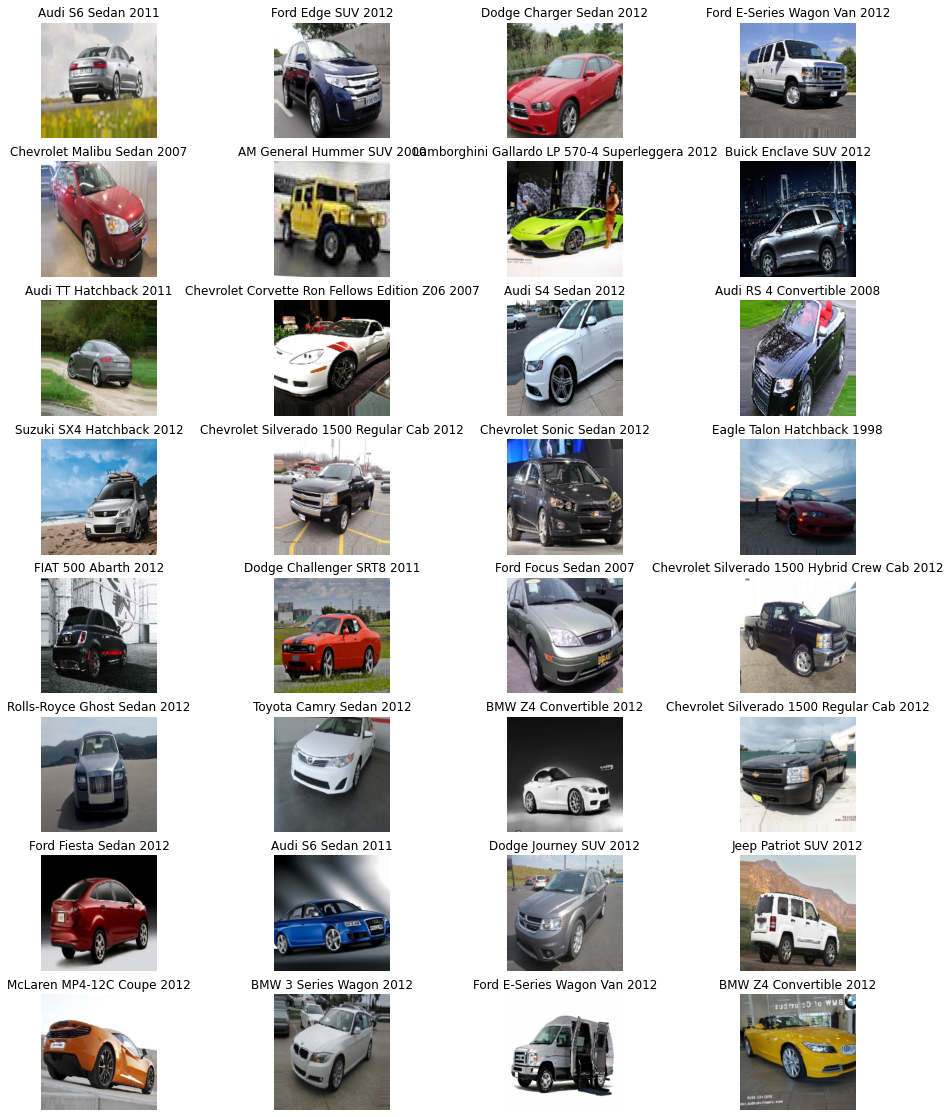

In [ ]:
show_batch(image_batch, label_batch)

In [ ]:
# Get the number of classes:
NUM_CLASSES = len(train_generator.class_indices)
print(NUM_CLASSES)

196


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from keras.layers import BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_1(num_classes):
  base_model_eff_b0 = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights="imagenet")

  # Keep the convolutional base's weight untouched:
  # base_model_eff_b0.trainable = False

  # fix the feature extraction part of the model
  for layer in base_model_eff_b0.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

  # Create a Sequential model:
  model = models.Sequential()
  model.add(base_model_eff_b0)

  # Rebuild top:
  model.add(layers.GlobalAveragePooling2D())
  # model.add(layers.BatchNormalization())

  # dropout_rate = 0.2  
  # model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(num_classes, activation="softmax"))

  # Compile:  
  # optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
  # model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
  return model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    # x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model = build_model(num_classes=NUM_CLASSES)

In [ ]:
model = build_model_1(num_classes=NUM_CLASSES)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 196)               251076    
Total params: 4,300,647
Trainable params: 293,092
Non-trainable params: 4,007,555
_________________________________________________________________


In [ ]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=10,                           
                    workers=8,             
                    max_queue_size=32,             
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
255/255 [==============================] - 250s 921ms/step - loss: 5.1435 - acc: 0.0381 - val_loss: 5.2823 - val_acc: 0.0050
Epoch 2/10
255/255 [==============================] - 238s 915ms/step - loss: 3.5489 - acc: 0.2783 - val_loss: 4.6894 - val_acc: 0.0645
Epoch 3/10
255/255 [==============================] - 237s 918ms/step - loss: 2.3846 - acc: 0.4791 - val_loss: 3.1601 - val_acc: 0.2706
Epoch 4/10
255/255 [==============================] - 236s 912ms/step - loss: 1.7592 - acc: 0.6014 - val_loss: 2.4757 - val_acc: 0.4039
Epoch 5/10
255/255 [==============================] - 237s 914ms/step - loss: 1.3280 - acc: 0.6943 - val_loss: 2.0062 - val_acc: 0.5019
Epoch 6/10
255/255 [==============================] - 238s 911ms/step - loss: 1.0272 - acc: 0.7612 - val_loss: 1.8860 - val_acc: 0.5231
Epoch 7/10
255/255 [==============================] - 237s 907ms/step - loss: 0.8442 - acc: 0.8064 - val_loss: 1.7973 - val_acc: 0.5396
Epoch 8/10
255/255 [============================

In [ ]:
# Save the weights:
model.save('eff_b0_cars_classification.h5')

In [ ]:
# Download the model:
from google.colab import files

files.download('eff_b0_cars_classification.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

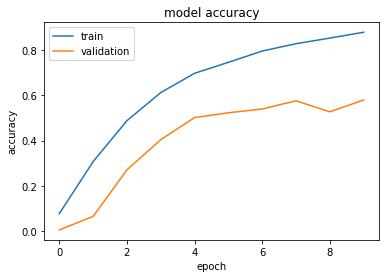

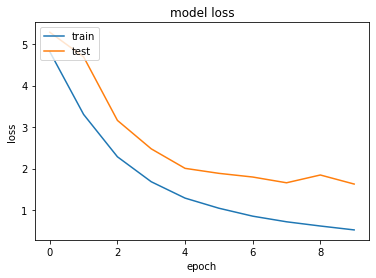

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # Plot accuracy
    plt.plot(hist.history["acc"])
    plt.plot(hist.history["val_acc"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_hist(history)

In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/car_data/car_data/train/Acura Integra Type R 2001/00198.jpg"
img_path = "/content/car_data/car_data/train/Acura Integra Type R 2001/00255.jpg"

# Read the image and resize it
img = image.load_img(img_path, target_size=(224, 224))

# Convert it to a Numpy array with target shape.
x = image.img_to_array(img)

print(x.shape)

# Reshape:
x = x.reshape((1,) + x.shape)
x /= 255.

result = model.predict([x])
index = np.argmax(result, axis=1)[0]

print(get_key(label_map, index))

(224, 224, 3)
Acura Integra Type R 2001
